## 2-DIMENSIONAL

## Input: Bộ dữ liệu gồm các tham số đầu vào: lon, lat: kinh độ, vĩ độ và rainfall là lượng mưa tương ứng
## Output: Mảng chứa các giá trị rainfall được nội suy trên các điểm của lưới

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'rainfall_data.xls'  
df = pd.read_excel(file_path)

rainfall_data = df['rainfall'].to_numpy()
lat = df['lat'].to_numpy()
lon = df['lon'].to_numpy()

grid_size = (6, 8)
num_rows = 100
num_cols = 100

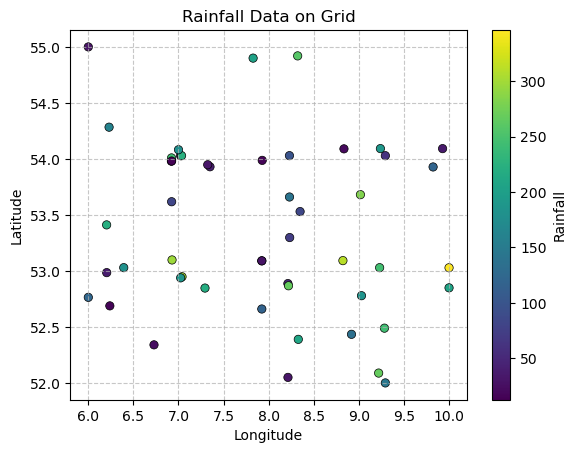

In [153]:
# Tạo ma trận lưới
grid = np.zeros(grid_size)

# Chấm các điểm trên lưới với màu sắc ứng với giá trị lượng mưa
plt.scatter(lon, lat, c=rainfall_data, cmap='viridis', marker='o', edgecolors='black', linewidth=0.5)
plt.colorbar(label='Rainfall')

# Hiển thị lưới
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rainfall Data on Grid')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

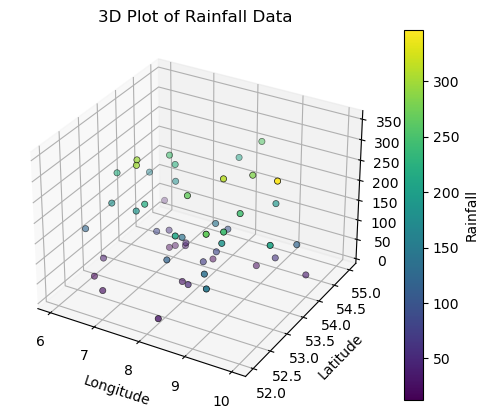

In [154]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(lon, lat, rainfall_data, c=rainfall_data, cmap='viridis', marker='o', edgecolors='black', linewidth=0.5)
cbar = plt.colorbar(sc, ax=ax, label='Rainfall')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Rainfall')
ax.set_title('3D Plot of Rainfall Data')

# Hiển thị đồ thị
plt.show()

### Hàm nội suy láng giềng gần 2 chiều

In [155]:
def nearest_neighbor_interpolation_2d(x, y, v, X, Y):
    interpolated_values = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            # Tìm điểm dữ liệu gần nhất
            idx = np.argmin((x - X[i, j])**2 + (y - Y[i, j])**2)
            
            # Gán giá trị nội suy
            interpolated_values[i, j] = v[idx]
    
    return interpolated_values


In [158]:
new_lat, new_lon = np.mgrid[52:55:500j, 6:10:400j]

interpolated_rainfall = nearest_neighbor_interpolation_2d(lat, lon, rainfall_data, new_lat, new_lon)

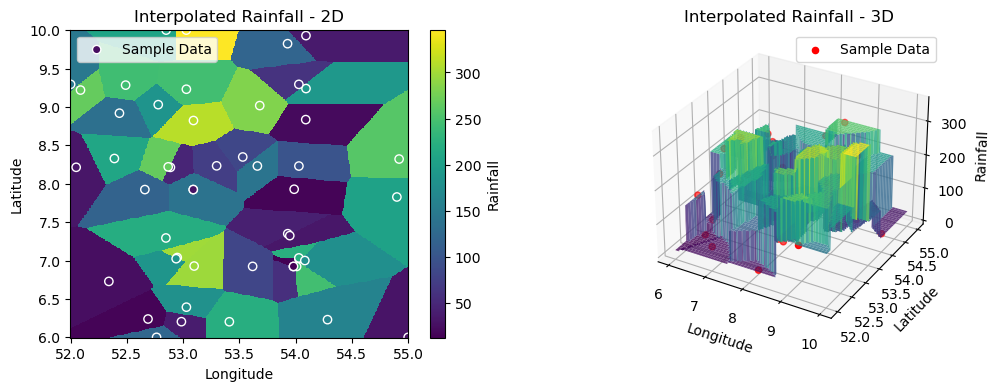

In [159]:
plt.figure(figsize=(12, 4))

# Đồ thị 2D
plt.subplot(121)
plt.pcolormesh(new_lat, new_lon,  interpolated_rainfall, shading='auto', cmap='viridis')
plt.scatter(lat, lon,  c=rainfall_data, cmap='viridis', edgecolors='w', linewidth=1, marker='o', label='Sample Data')
plt.colorbar(label='Rainfall')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Interpolated Rainfall - 2D')
plt.legend()

# Đồ thị 3D
ax = plt.subplot(122, projection='3d')
ax.plot_surface(new_lon, new_lat, interpolated_rainfall, cmap='viridis', alpha=0.8)
ax.scatter(lon, lat, rainfall_data, c='red', marker='o', label='Sample Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Rainfall')
ax.set_title('Interpolated Rainfall - 3D')
ax.legend()

plt.show()

## 3-DIMENSIONAL

## Input: Bộ dữ liệu gồm các tham số đầu vào: x, y, z: biểu diễn tọa độ của dữ liệu gốc và v là giá trị nhiệt độ tương ứng
## Output: Mảng các giá trị v được nội suy trên các điểm của lưới

/var/folders/hk/c9c4mlq57ns0qq7d4n_m9y480000gn/T/ipykernel_3611/3424342110.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


Text(0.5, 0, 'Z')

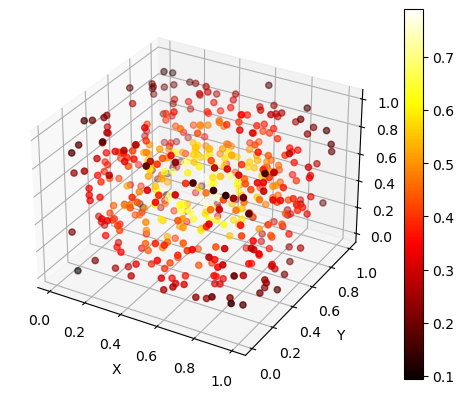

In [147]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

f=open('Testdata_interpolate.csv','r')
headers = ["x","y","z","v"]
data = pd.read_csv(f, delimiter = ",",header=1,names=headers)
x=data.x
y=data.y
z=data.z
v=data.v

fig = plt.figure()
ax=fig.gca(projection='3d')
sc=ax.scatter(x, y, z, c=v, cmap=plt.hot())
plt.colorbar(sc)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



### Hàm nội suy láng giềng gần 3 chiều

In [148]:
def nearest_neighbor_interpolation_3d(x, y, z, v, X, Y, Z):
    interpolated_values = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(X.shape[2]):
                # Tìm điểm dữ liệu gần nhất
                idx = np.argmin((x - X[i, j, k])**2 + (y - Y[i, j, k])**2 + (z - Z[i, j, k])**2)
                
                interpolated_values[i, j, k] = v[idx]
    
    return interpolated_values

/var/folders/hk/c9c4mlq57ns0qq7d4n_m9y480000gn/T/ipykernel_3611/4083294115.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig1.gca(projection='3d')


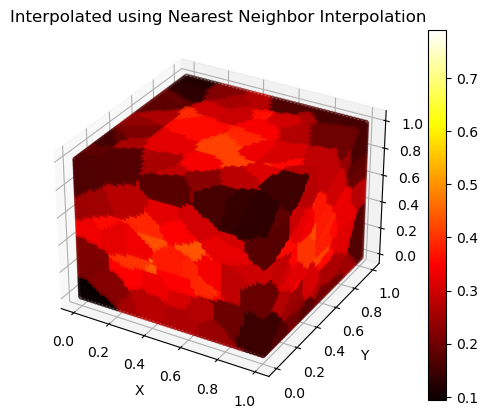

In [149]:
X, Y, Z = np.mgrid[0:1:50j, 0:1:50j, 0:1:50j]

V1 = nearest_neighbor_interpolation_3d(x, y, z, v, X, Y, Z)

fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
sc1 = ax1.scatter(X, Y, Z, c=V1, cmap=plt.hot())
plt.colorbar(sc1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
plt.title('Interpolated using Nearest Neighbor Interpolation')

plt.show()